In [1]:
# mnist  data with kears tensorflow
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential  ## feed forward network
from keras.layers.core import Dense,Activation,Flatten
from keras.optimizers import SGD
from keras.utils import np_utils
import tensorflow as tf

Using TensorFlow backend.


In [0]:
### create the network parameter
EPOCH = 50
BATCH_SIZE=128
VERBOSE=1
OUTPUT_CLASS=10
OPTIMIZER='adam'
HIDDEN_LAYER=128
VALIDATION_SPLIT=.2
LOSS='sparse_categorical_crossentropy'

In [0]:
###load data
(x_train,y_train),(x_test,y_test) = mnist.load_data()

### there is a flatten layer so you dont need to reshape the data


# catagorical encoding
#y_train = np_utils.to_categorical(y_train,OUTPUT_CLASS)
#y_test = np_utils.to_categorical(y_test,OUTPUT_CLASS)


## normalize the data
x_train = keras.utils.normalize(x_train)
x_test = keras.utils.normalize(x_test)




5


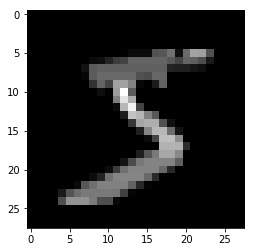

In [4]:
import matplotlib.pyplot as plt
plt.gray()
print (y_train[0])
plt.imshow(x_train[0])

In [5]:
## the image is the 28x28 and we have to reshape it

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000, 28, 28)


In [6]:

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(HIDDEN_LAYER, activation=tf.nn.relu),
    Dense(HIDDEN_LAYER, activation=tf.nn.relu),
    Dense(HIDDEN_LAYER, activation=tf.nn.relu),
    Dense(OUTPUT_CLASS, activation=tf.nn.softmax)
])


Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.compile(optimizer=OPTIMIZER, 
              loss=LOSS,
              metrics=['accuracy'])


In [8]:
model.summary

<bound method Network.summary of <keras.engine.sequential.Sequential object at 0x7fca98dcad68>>

In [9]:
model.fit(x_train,y_train,batch_size=BATCH_SIZE,epochs=EPOCH,verbose=VERBOSE,validation_split=VALIDATION_SPLIT)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 3s 66us/step - loss: 0.3882 - acc: 0.8883 - val_loss: 0.1569 - val_acc: 0.9528
Epoch 2/50
48000/48000 [==============================] - 3s 60us/step - loss: 0.1414 - acc: 0.9570 - val_loss: 0.1211 - val_acc: 0.9633
Epoch 3/50
48000/48000 [==============================] - 3s 60us/step - loss: 0.0979 - acc: 0.9695 - val_loss: 0.1037 - val_acc: 0.9703
Epoch 4/50
48000/48000 [==============================] - 3s 61us/step - loss: 0.0742 - acc: 0.9772 - val_loss: 0.1054 - val_acc: 0.9686
Epoch 5/50
48000/48000 [==============================] - 3s 61us/step - loss: 0.0583 - acc: 0.9813 - val_loss: 0.0917 - val_acc: 0.9737
Epoch 6/50
48000/48000 [==============================] - 3s 60us/step - loss: 0.0440 - acc: 0.9861 - val_loss: 0.0921 - val_acc: 0.9734
Epoch 7/50
48000/48000 [==============================] - 3s 63us/step - loss: 0

In [10]:
score = model.evaluate(x_test,y_test,verbose=VERBOSE)

10000/10000 [==============================] - 0s 44us/step


In [11]:
score

[0.1476075966992925, 0.9786]